In [5]:
FILENAME = "IMG60.TXT"
IMG_WIDTH = 240
IMG_HEIGHT = 240

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
file = open(FILENAME, "rb").read()
numbers = []
for i in range(IMG_HEIGHT*IMG_WIDTH):
    numbers.append(file[i*2] << 8 | file[i*2+1])

Why is there twice as many bytes as there should be?

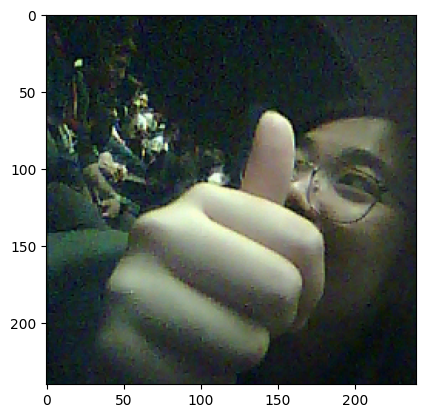

In [8]:
img = np.empty((IMG_WIDTH, IMG_HEIGHT, 3), np.uint8)
for y in range(IMG_HEIGHT):
    for x in range(IMG_WIDTH):
        img[x][y][0] = (0xF800 & numbers[y*IMG_WIDTH+x]) >> 8      # r
        img[x][y][1] = (0x07E0 & numbers[y*IMG_WIDTH+x]) >> 3      # g
        img[x][y][2] = (0x001F & numbers[y*IMG_WIDTH+x]) << 3      # b

plt.imshow(img,vmin=0, vmax=255)